# Imports

In [92]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_folder = Path("../../data")

# Create folder for the plots (plots_conceptual)
plots_folder = Path("plots_conceptual")
if not os.path.exists(plots_folder):
    os.makedirs(plots_folder)

# Constants

In [93]:
TRESHOLD_DICT = {
        'nse': 0.0,
        'kge': 0.0,
        # 'fhv': 0.0
}

# results_folder = 'M0_results_569basins_1980_2010'
results_folder = 'M0_results_569basins_1980_2010_RK23'

results_path = data_folder / results_folder / 'model_metrics'

periods = ['train', 'valid']
metrics = ['nse', 'fhv', 'kge']

In [94]:
os.listdir(str(results_path))

FileNotFoundError: [Errno 2] No such file or directory: '../../data/M0_results_569basins_1980_2010_RK23/model_metrics'

# Functions

In [ ]:
def annotate_statistics(ax, data, statistic='mean', color='tab:red', gap=0.05, **kwargs):
    
    data_aux = data[data > 0]
    
    if statistic == 'mean':
        value = np.mean(data_aux)
        label = f'Mean: {value:.3f}'
    elif statistic == 'median':
        value = np.median(data_aux)
        label = f'Median: {value:.3f}'
    else:
        raise ValueError("Invalid statistic. Choose 'mean' or 'median'.")

    ax.axvline(value, color=color, linestyle='--', linewidth=2)
    
    # Calculate the gap
    ylim = ax.get_ylim()
    gap_height = gap * (ylim[1] - ylim[0])
    
    if statistic == 'mean':
        # Check if mean is greater (right) or smaller (left) than the median
        if value > np.median(data_aux):
            ax.text(value + 100*gap, ylim[1] - gap_height, label, va='top', ha='left', color=color, **kwargs)
        else:
            ax.text(value - gap, ylim[1] - gap_height, label, va='top', ha='right', color=color, **kwargs)
    elif statistic == 'median':
        # Check if median is greater (right) or smaller (left) than the mean
        if value > np.mean(data_aux):
            ax.text(value + gap, ylim[1] - gap_height, label, va='top', ha='left', color=color, **kwargs)
        else:
            ax.text(value - 100*gap, ylim[1] - gap_height, label, va='top', ha='right', color=color, **kwargs)

# Load data

<>:40: SyntaxWarning: invalid escape sequence '\l'
<>:40: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_1915720/3838555296.py:40: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title(f'Conceptual model (exp-hydro) (${metric.upper()} \leq {threshold}$:  {n_below_threshold} counts) | {period} period')


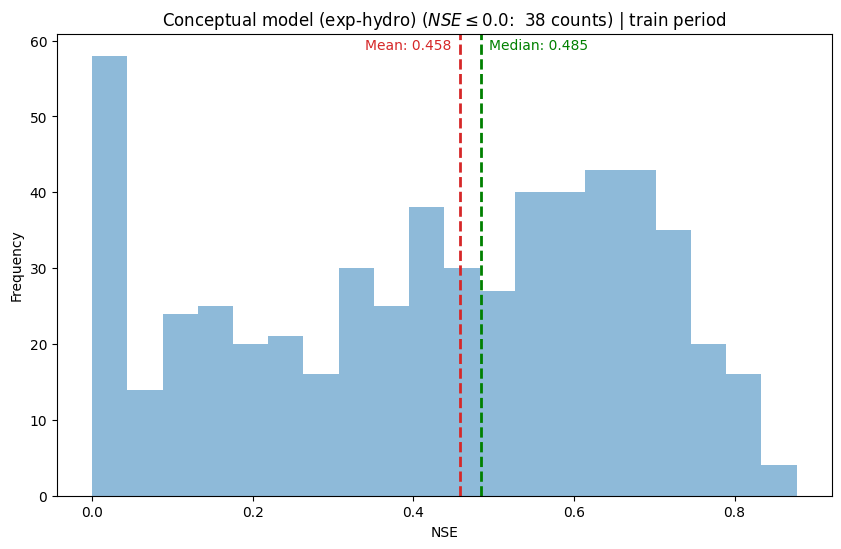

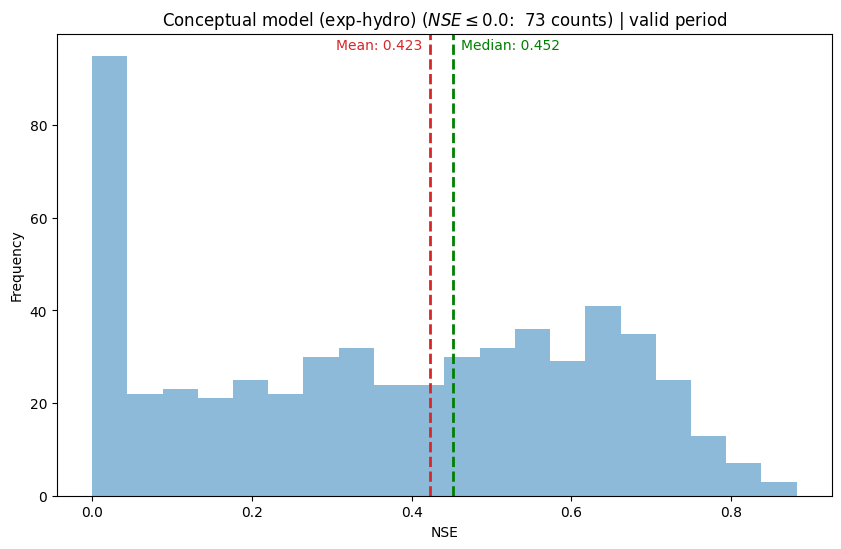

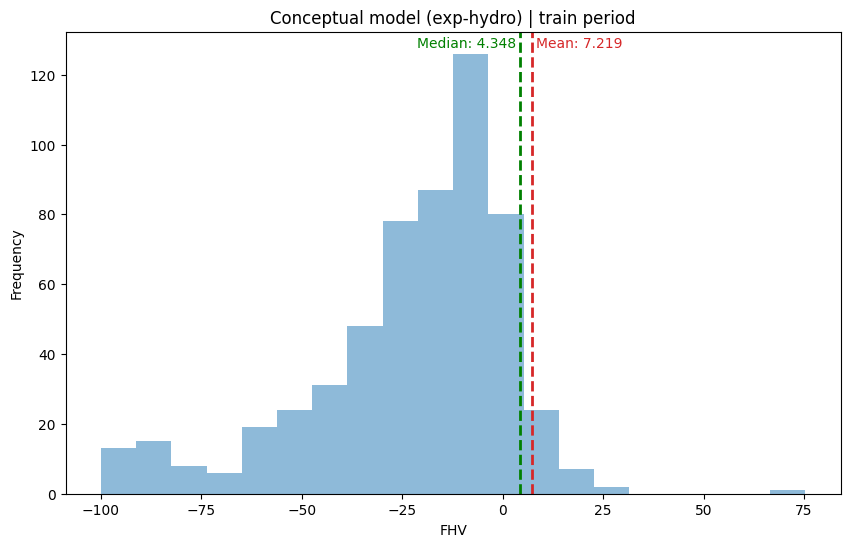

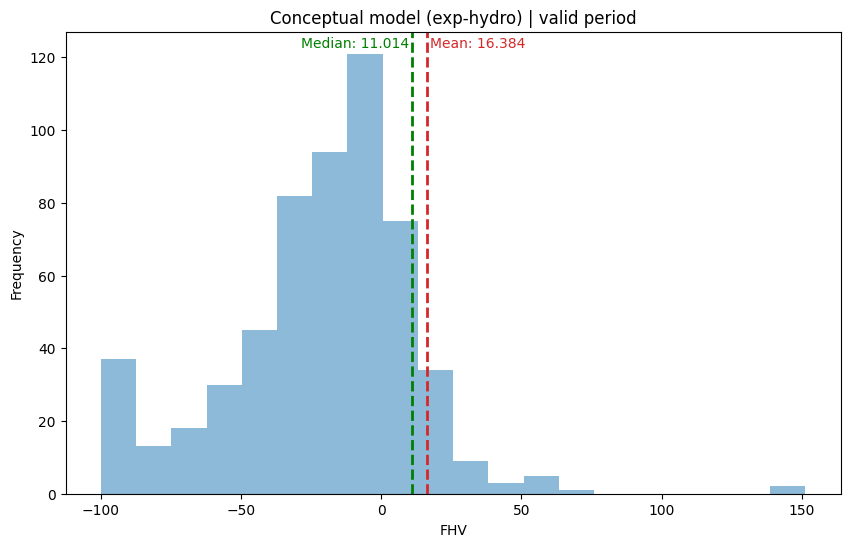

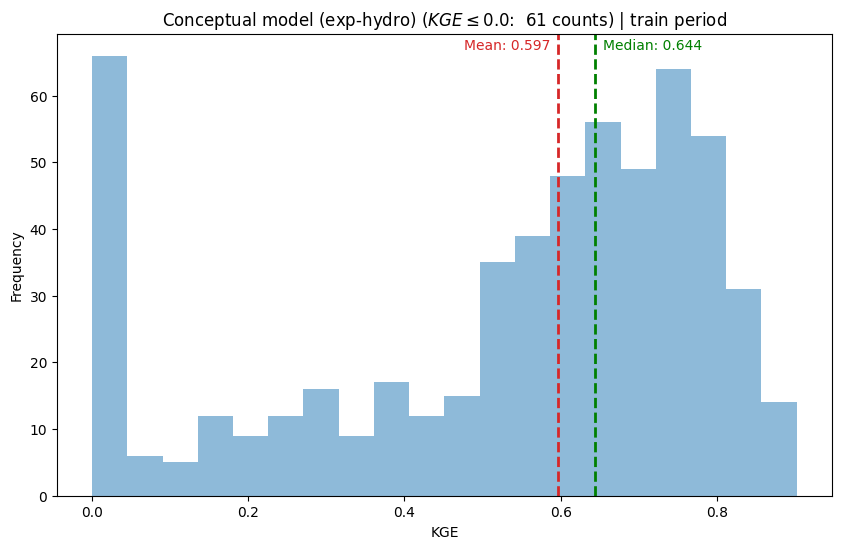

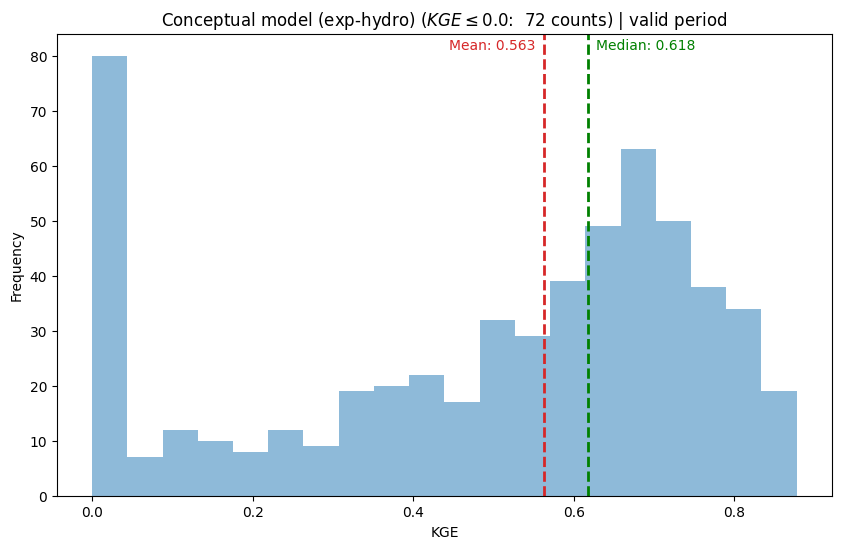

In [ ]:
for metric in metrics:
        
    for period in periods:

        df = pd.read_csv(results_path / f'metrics_{period}.csv')
        # Filter by columns basin_ID and metrics
        df = df[['basin_ID'] + metrics]

        # Plot histogram of the metric values
        fig, ax = plt.subplots(figsize=(10, 6))

        # Filter by threshold
        if metric in TRESHOLD_DICT:
            threshold = TRESHOLD_DICT[metric]
            # Count basins below the threshold
            n_below_threshold = (df[metric] <= threshold).sum()
            # Values below the threshold to be equal to the threshold
            # df = df[df[metric] > threshold]
            df[metric] = np.where(df[metric] <= threshold, threshold, df[metric])

        # Calculate the bins for the histogram
        hist_values = df[metric].values
        n_bins = 20
        min_value = hist_values.min()
        max_value = hist_values.max()
        bin_width = (max_value - min_value) / n_bins
        bins = np.linspace(min_value, max_value, n_bins + 1)

        # result_df[metric].plot(kind='hist', bins=bins, ax=ax)
        # result_df[metric].hist(bins=20, ax=ax)
        ax.hist(hist_values, bins=bins, color='tab:blue', alpha=0.5)

        # Add mean and median value plot to the histogram
        annotate_statistics(ax, hist_values, statistic='mean', color='tab:red', gap=0.01)
        annotate_statistics(ax, hist_values, statistic='median', color='green', gap=0.01)


        # $NSE \leq 0$: {nse_less_than_0} counts)
        if metric in TRESHOLD_DICT:
            ax.set_title(f'Conceptual model (exp-hydro) (${metric.upper()} \leq {threshold}$:  {n_below_threshold} counts) | {period} period')
        else:
            ax.set_title(f'Conceptual model (exp-hydro) | {period} period')
        ax.set_xlabel(f'{metric.upper()}')
        ax.set_ylabel('Frequency')
        plt.show()

        # save the plot
        fig.savefig(plots_folder / f'{metric}_histograms_{period}.png', dpi=150, bbox_inches='tight')

